# Marketing Data EDA

### Table of Contents

* [Goals](#goals)
* [Data](#Data)
    * [Loading the Data](#section1_1)
    * [Data Information](#section1_2)
* [Data Cleaning](#cleaning)
    * [Adding an Age Column](#section2_1)
    * [Checking the Education Variable](#section2_2)
* [Exploratory Data Analysis](#EDA)
    * [Big Picture](#section3_1)
    * [Purchasing Behavior by Income](#section3_2)
    * [More Purchasing Behavior by Income](#section3_3)
    * [Purchasing Behavior by Education and Income](#section3_4)
    * [Purchasing Behavior by Age](#section3_5)
* [Conclusion](#conclusion)

### Goals <a class="anchor" id="Goals"></a>

This notebook contains an analysis on some marketing data. The goal for this project is as follows:
* Get acquainted with the data
* Clean the data so it is ready for analysis
* Develop some questions for analysis
* Analyze variables within the data to gain patterns and insights on these questions

### Data <a class="anchor" id="Data"></a>

The data for this project was downloaded from [Codecademy](https://www.codecademy.com) which referenced data from [Kaggle](https://www.kaggle.com/datasets/jackdaoud/marketing-data/data).

Information regarding the features for the data are located in the `Column` section on the Kaggle website.

Some code inspiration for this analysis was sourced from [this noteboook](https://www.kaggle.com/dimitriirfan/market-eda).

#### Loading the Data <a class="anchor" id="section1_1"></a>
First, the necessary libraries are loaded into the notebook. The pandas library is used to import data from marketing_data.csv and preview the first five rows of the DataFrame.

In [1]:
# import the libraries needed for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


C:\Users\User\AppData\Local\Temp\ipykernel_12956\3712680304.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv("marketing_data.csv")
# see all columns
pd.set_option('display.max_columns', None)
data.head(5)

import warnings 
warnings.filterwarnings('ignore')

### Data Infromation

Some immediate insights are: 

* There are 28 columns and 2240 rows
* The name and datatype of each column -- most valuesa re integers in this dataset
* The `income` column has missing data, values that are nit integers or floats, and an extraspace in the column name, so some cleaning will be necessary for this column prior to conducting EDA. 
* The column names could be renamed for more consistency and ease of use.
* Some basic summary statistics on each of the numerical variables.

In [3]:
data.columns

Index(['id', 'YearBirth', 'Education', 'MaritalStatus', 'Income', 'Kidhome',
       'Teenhome', 'DtCustomer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2240 non-null   int64 
 1   YearBirth            2240 non-null   int64 
 2   Education            2240 non-null   object
 3   MaritalStatus        2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   DtCustomer           2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProducts      2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [5]:
# check for missing data
data.isnull().sum()

id                      0
YearBirth               0
Education               0
MaritalStatus           0
Income                 24
Kidhome                 0
Teenhome                0
DtCustomer              0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProducts         0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [6]:
data.describe()

,id,YearBirth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Data Cleaning 

As mendtioned, the `Income` column needs some cleaning. The column names overall will be renamed for more consistency. To do that, the follwing is done:

* Put all columns in the snake_format suing regex and list comprehention. 
* Change `Income` values to floats
* Set the values as floats

The `Income` distribution is then looked at using boxplots. Since there is one large outlier, it is removed from the `data`. Next, the missing values are replaced with the mean income using the `.median()` method.

`Income` is one of the main variables that will be explored in the analysis, so it is essential that it is tidy and ready for exploration

In [7]:
#import the regEx library
import re

In [8]:
# column cleaning
data.Income = data.Income.replace('[\$,]','', regex=True).astype('float')
# summary stats
data.Income.describe()
# put all cols into snake case
data.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', x).lower() for x in data.columns]

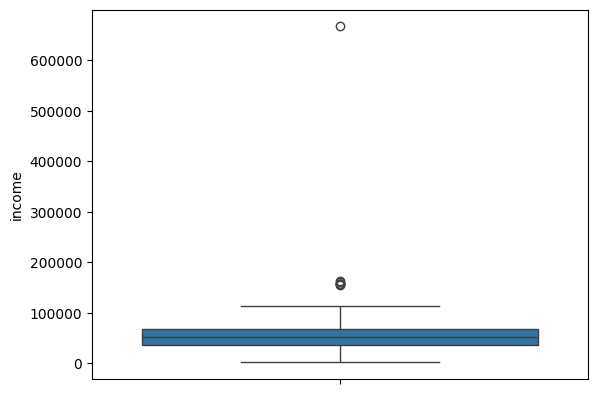

<Figure size 640x480 with 0 Axes>

In [9]:
plt.figure()
sns.boxplot(data.income)
plt.show()
plt.clf()

This boxplot shows a major outlier on the right, so I decide to remove it from the dataset. 

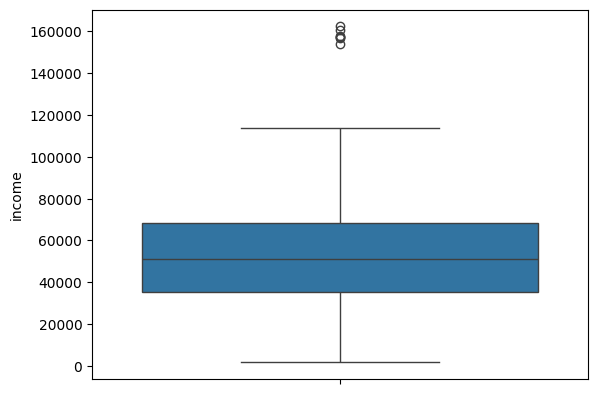

count      2215.000000
mean      51969.861400
std       21526.320095
min        1730.000000
25%       35284.000000
50%       51373.000000
75%       68487.000000
max      162397.000000
Name: income, dtype: float64

<Figure size 640x480 with 0 Axes>

In [10]:
data = data[data.income < 300000]

plt.figure()
sns.boxplot(data.income)
plt.show()
plt.clf()

data.income.describe()

After removing this outlier the distribution is now more symmetric. There are still some outliers, however they're considered to be within the normal range of annual income in the real world. 

In [11]:
# replace missing data with medina income
data.income = data.income.fillna(data.income.median())

### Addiing an `age` column

The `data` Dataframe contains `year_birth` column fro mwhich we can derive the age of each customer. To do this, we act as follwing: 
* I add a new column called `age` by deducting actual year from the `year_birth` column.
* I remove outliers that may affect the `age` column.

In [12]:
data['age'] = 2024 - data.year_birth

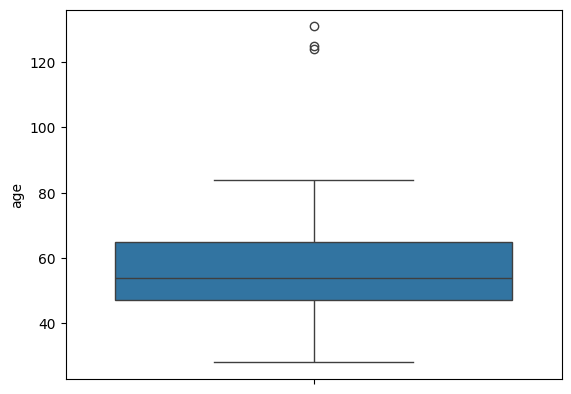

count    2215.000000
mean       55.183296
std        11.987000
min        28.000000
25%        47.000000
50%        54.000000
75%        65.000000
max       131.000000
Name: age, dtype: float64

<Figure size 640x480 with 0 Axes>

In [13]:
plt.figure()
sns.boxplot(data.age)
plt.show()
plt.clf()

data.age.describe()

In [14]:
data = data[data.age < 100]

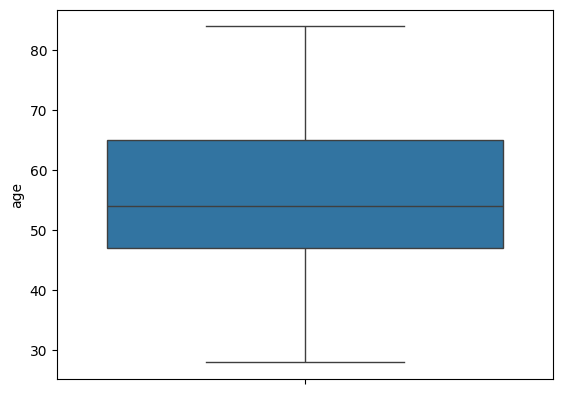

count    2212.000000
mean       55.086347
std        11.701599
min        28.000000
25%        47.000000
50%        54.000000
75%        65.000000
max        84.000000
Name: age, dtype: float64

<Figure size 640x480 with 0 Axes>

In [15]:
plt.figure()
sns.boxplot(data.age)
plt.show()
plt.clf()
data.age.describe()

After removing the outliers the `age` distribution is now symmetric and ready for analysis. 

### Checking the Education Variable

The education variable is another column on which we'll focus in our analysis. A boxplot is used to see if any cleaning is needed prior to EDA. Since there are no missing data, I leave it as is. 

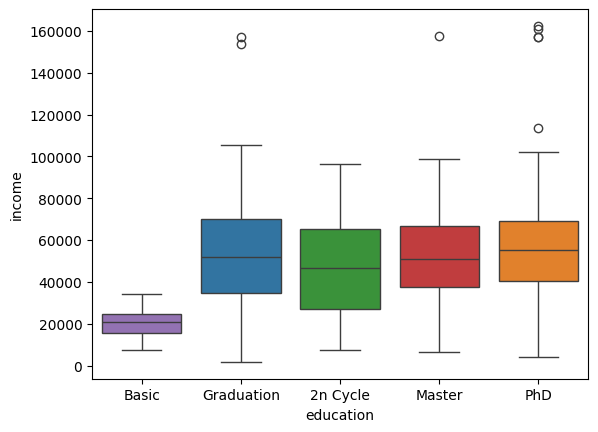

<Figure size 640x480 with 0 Axes>

In [16]:
plt.figure()
sns.boxplot(x = data.education, y= data.income, order=['Basic', 'Graduation', "2n Cycle", "Master", "PhD"], hue=data.education)
plt.show()
plt.clf()

### Exploratory Data Analysis <a class="anchor" id="EDA"></a>

After cleaning and tydying some data, the dataset is ready for EDA. The following independent varaiables will be focused on in our analysis:
* `income`
* `education`
* `age`

The goal will be to see how this independent variables associate with the follwing independent variables:
* `mnt_wines`
* `mnt_fruits`
* `mnt_meat_products`
* `mnt_fish_products`
* `mnt_sweet_products`  
* `mnt_gold_products`  
* `num_deals_purchases`
* `num_web_purchases`  
* `num_catalog_purchases`  
* `num_store_purchases`

My hope here is that through summary statistics and vizualizations to answer the following question:
* Does a shopper's income, education level, and/or age relate to their purchasing behavior?

Along the way, this question may be refined and other questions may pop up. 

#### Big Picture <a class="anchor" id="section3_1"></a>

For observing the dataset as a whole, I use the `DataFrame.hist()`, since it gives a full view of all numerical variables in the distribution. Most of the amounts bought and number purchased variables are skewed right and have similar distributions.

As next, correlations between all numerical variables are viewed using a heat matrix. The heat matrix shows that `income` has the strongest association with numerous variables. Interestingly, it showed that `age` may not be a huge factor overall. This is something to look into it a bit more in the analysis.

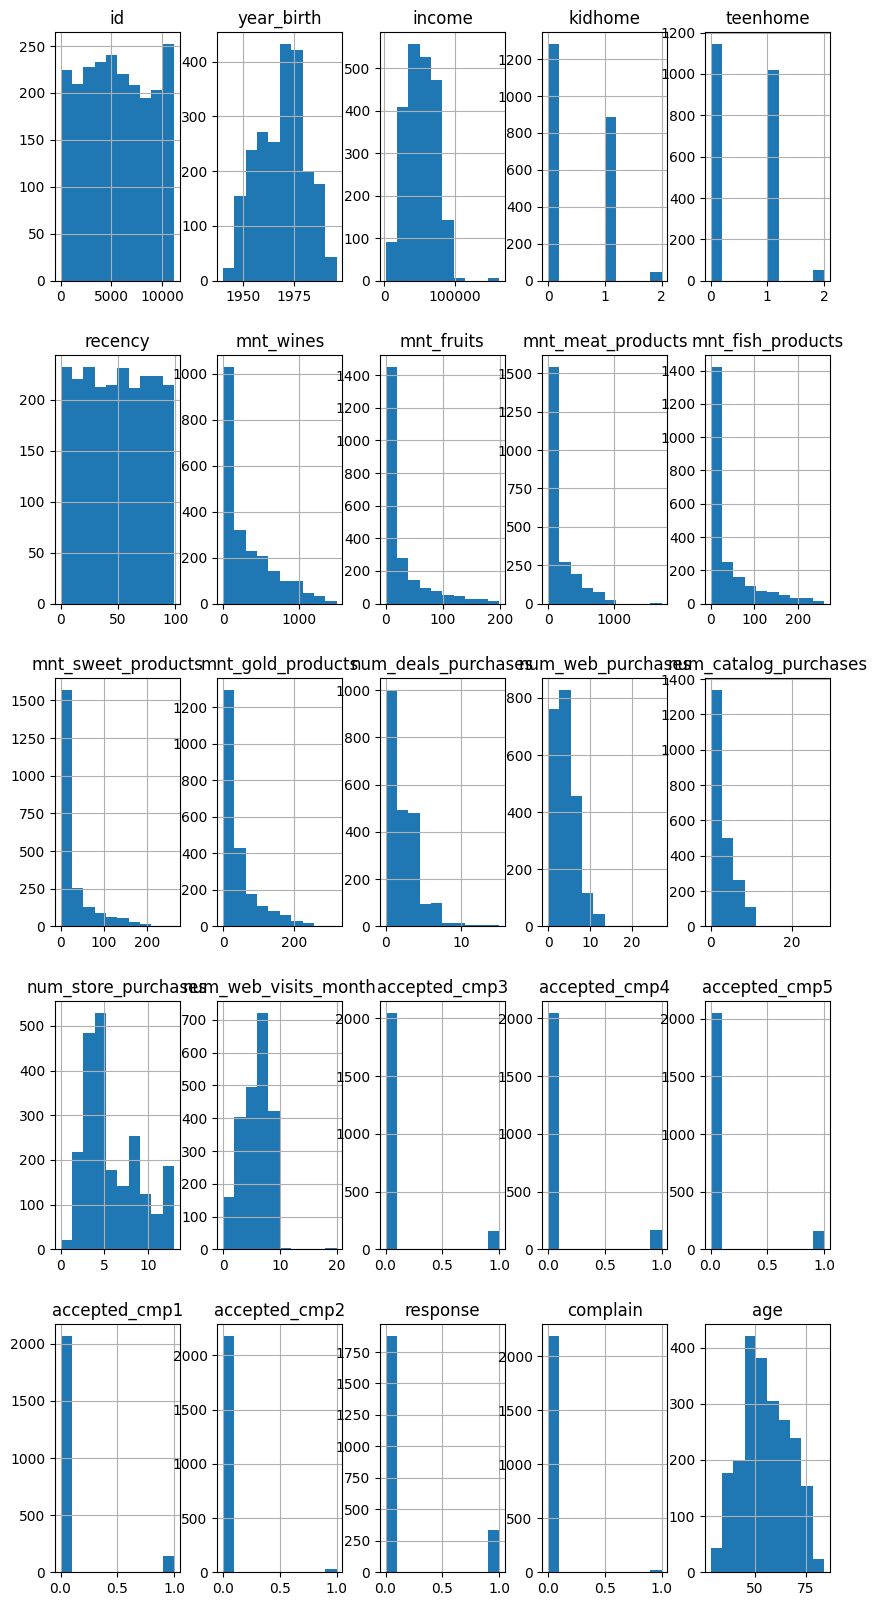

<Figure size 640x480 with 0 Axes>

In [41]:
fig = plt.figure(figsize=(10,20))
ax= fig.gca()
data.hist(ax=ax)
plt.show()
plt.clf()

This data overview shows that the purchase behaviour columns are all skewed to the right. 

In [42]:
# data.corr()
data.select_dtypes(include='number').corr()

,id,year_birth,income,kidhome,teenhome,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_products,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,response,complain,age
id,1.000000,0.005086,0.000905,0.000971,-0.003508,-0.044147,-0.018906,0.010008,-0.003706,-0.022405,-0.004381,-0.008013,-0.040849,-0.017232,-0.000404,-0.011733,-0.008610,-0.035668,-0.023692,-0.004441,-0.017989,-0.014901,-0.021112,0.031839,-0.005086
year_birth,0.005086,1.000000,-0.199977,0.237497,-0.361932,-0.015694,-0.164615,-0.013447,-0.033622,-0.041154,-0.021516,-0.059779,-0.066156,-0.162265,-0.125856,-0.138998,0.120282,0.061097,-0.070035,0.019025,-0.011941,-0.007821,0.020937,-0.004602,-1.000000
income,0.000905,-0.199977,1.000000,-0.514523,0.034565,0.007965,0.688209,0.507354,0.692279,0.520040,0.523599,0.388299,-0.108207,0.459265,0.696589,0.631424,-0.650257,-0.015152,0.219633,0.395569,0.327524,0.104036,0.161387,-0.027900,0.199977
kidhome,0.000971,0.237497,-0.514523,1.000000,-0.039066,0.010623,-0.497203,-0.373258,-0.439031,-0.388643,-0.377843,-0.354922,0.216594,-0.372327,-0.504598,-0.501863,0.447258,0.016135,-0.162111,-0.204582,-0.174261,-0.081911,-0.077901,0.037067,-0.237497
teenhome,-0.003508,-0.361932,0.034565,-0.039066,1.000000,0.014392,0.003945,-0.175905,-0.261134,-0.205235,-0.163107,-0.018579,0.386805,0.162239,-0.112477,0.049212,0.130985,-0.042797,0.038168,-0.190119,-0.145198,-0.015633,-0.154402,0.007746,0.361932
recency,-0.044147,-0.015694,0.007965,0.010623,0.014392,1.000000,0.015981,-0.005257,0.022914,0.000788,0.025244,0.018148,0.002591,-0.005680,0.024197,-0.000460,-0.018965,-0.032361,0.017520,0.000233,-0.021147,-0.001429,-0.200114,0.005713,0.015694
mnt_wines,-0.018906,-0.164615,0.688209,-0.497203,0.003945,0.015981,1.000000,0.385844,0.568081,0.396915,0.389583,0.391461,0.009117,0.553663,0.634237,0.640219,-0.321616,0.061360,0.373349,0.472889,0.351610,0.206309,0.246320,-0.036420,0.164615
mnt_fruits,0.010008,-0.013447,0.507354,-0.373258,-0.175905,-0.005257,0.385844,1.000000,0.546740,0.593038,0.571474,0.393459,-0.134191,0.302301,0.485611,0.459875,-0.417741,0.014644,0.006598,0.208990,0.192417,-0.009924,0.123007,-0.002956,0.013447
mnt_meat_products,-0.003706,-0.033622,0.692279,-0.439031,-0.261134,0.022914,0.568081,0.546740,1.000000,0.572986,0.534624,0.357556,-0.121128,0.306841,0.733787,0.486349,-0.539194,0.018416,0.091677,0.375252,0.313379,0.043549,0.237966,-0.021017,0.033622
mnt_fish_products,-0.022405,-0.041154,0.520040,-0.388643,-0.205235,0.000788,0.396915,0.593038,0.572986,1.000000,0.583484,0.426299,-0.143147,0.299428,0.532241,0.457885,-0.446151,-0.000276,0.016058,0.194793,0.261712,0.002322,0.108135,-0.019098,0.041154


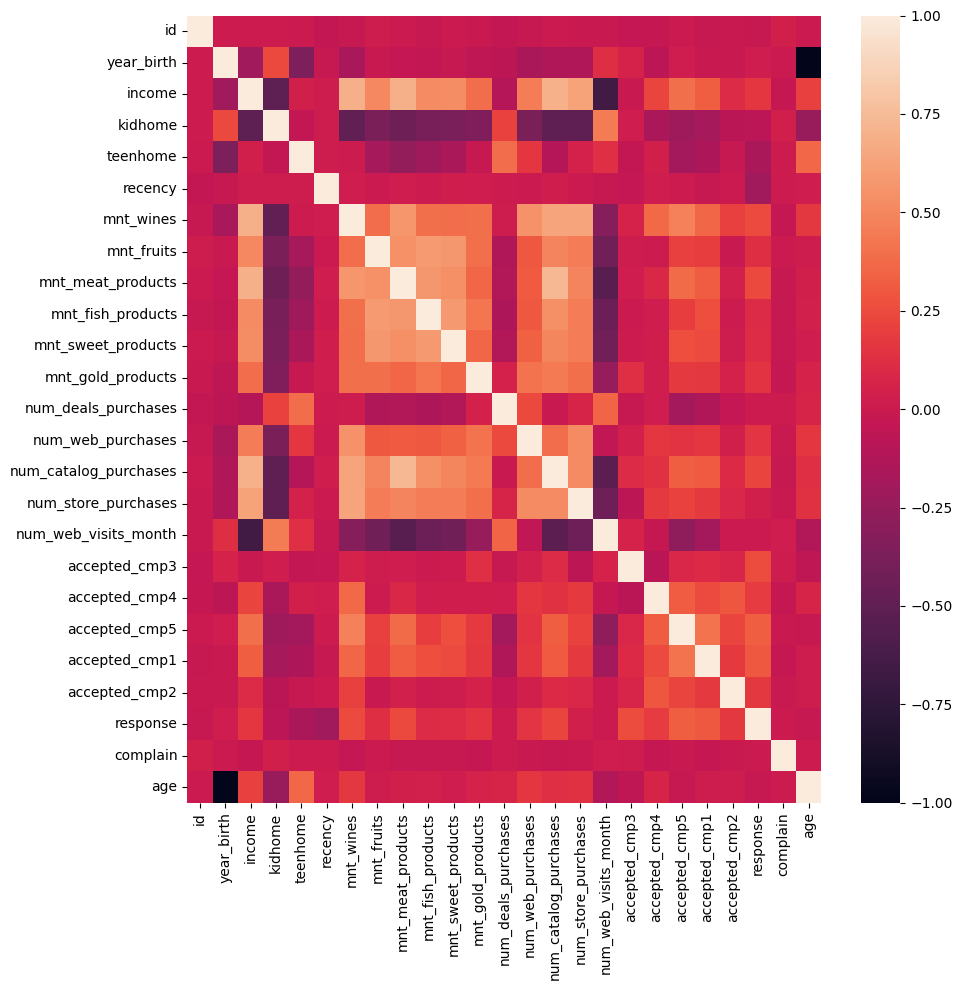

<Figure size 640x480 with 0 Axes>

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(data=data.select_dtypes(include='number').corr(), annot=False)
plt.tight_layout()
plt.show()
plt.clf()

The table of correlations does not offer much help as there are too many numbers to read through. However, the heatmap shows that `income` will be the major variable to focus on in the analysis. 

#### Purchasing Behavior by Income <a class="anchor" id="section3_2"></a>

Now it's time to start looking into the big question. I use a `for` loop to see the relationship between `income` and each type of purchase variable. I use the `education` varaible on `hue` parameter to look for any pattern that can be deciphered between `income` and each type of purchase.

In [67]:
# get num purchases from column list by using list comprehension  
num_purchases_col = [x for x in data.columns if 'purchases' in x]


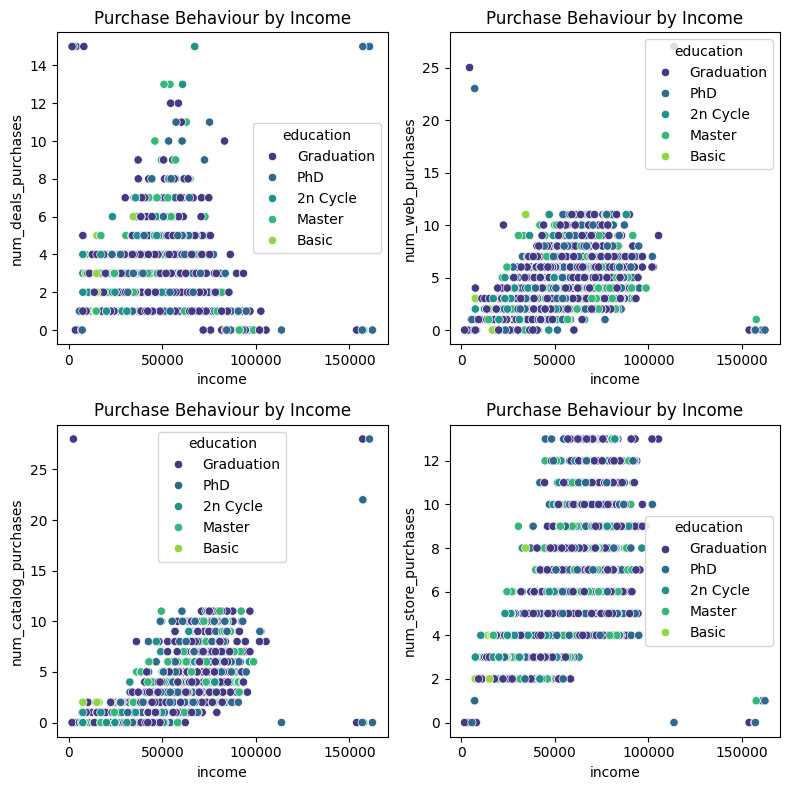

<Figure size 640x480 with 0 Axes>

In [66]:
# keep count of plot for subplots 
plot = 0
fig = plt.figure(figsize=(8,8))
# loop through each column to plot
for i in range(len(num_purchases_col)):
    plot+=1
    # subplot to create grid of plots
    ax = plt.subplot(2,2,plot)
    # scatterplot of purchase type vs income with education
    sns.scatterplot(x=data.income, 
                    y=data[num_purchases_col[i]], 
                    hue=data.education, 
                    palette='viridis')
    plt.title('Purchase Behaviour by Income')

plt.tight_layout()
plt.show()
plt.clf()

There is a fairly strong, positive linear relationship between `income` and the follwing three variables: 
* `num_catalog_purchases`
* `num_store_purchases`
* `num_web_purchases`

Between `income` and `num_deals_purchases`, however, there is no ovious relationship. It appears there might be a weak, negative linear relationship but it is not strong enough to be confident. It is also difficult to decipher any patterns associated with `education` in the plots, so further analysis is needed on the variable. 

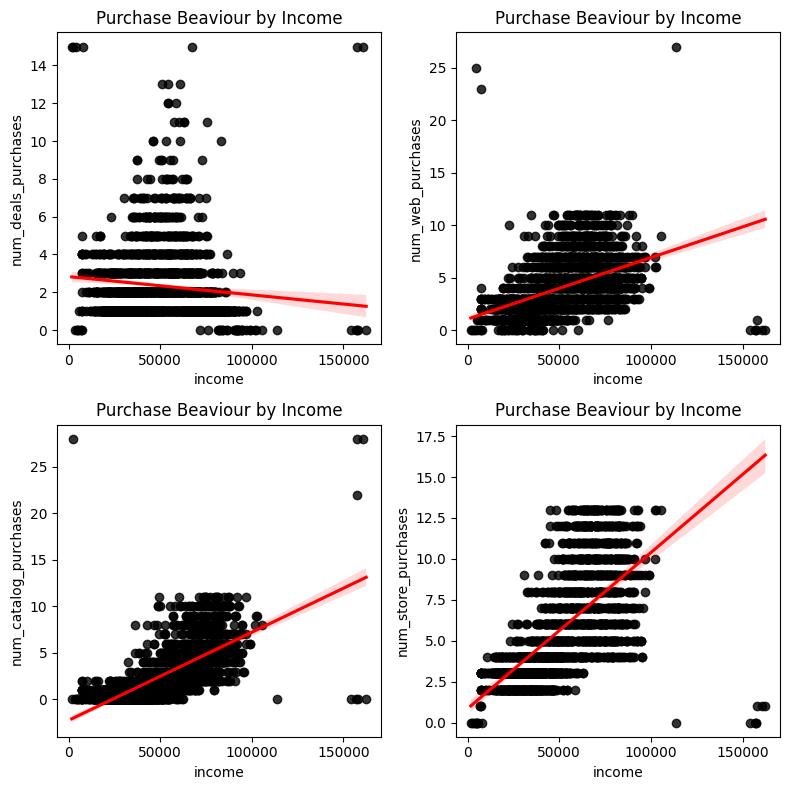

<Figure size 640x480 with 0 Axes>

In [68]:
# use the same columns and keep count of subplots
fig = plt.figure(figsize=(8,8))
plot=0
# loop through number of columns to plot
for i in range(len(num_purchases_col)):
    plot+=1
    # set up subplots
    ax = plt.subplot(2, 2, plot)
    # regression plot of purchases vs. income
    sns.regplot(x=data.income, y=data[num_purchases_col[i]],
                scatter_kws={'color': 'black'}, line_kws={'color': 'red'})
    plt.title('Purchase Beaviour by Income')

plt.tight_layout()
plt.show()
plt.clf()

Used `regplot()` to get a better look at the linear relationships. `num_catalog_purchases` and `num_store_purchases` have the strongest positive, linear relationship with `income`. 

These plots also show that `income` and `num_deals_purchases` have a linear, negative relationship; however, it is still too weak to be conclusive.

For some further analysis, a new column in the DataFrame called `total_purchases` is added to the `marketing_data` DataFrame. It is the sum of all `purchases type` variables. The same analysis with `.scatterplot()` and `.regplot()` plot methods is done on this new column.

In [69]:
# add a new colum total_purchases to data
data['total_purchases'] = data["num_deals_purchases"]+ data["num_catalog_purchases"] + data["num_web_purchases"] + data["num_store_purchases"]

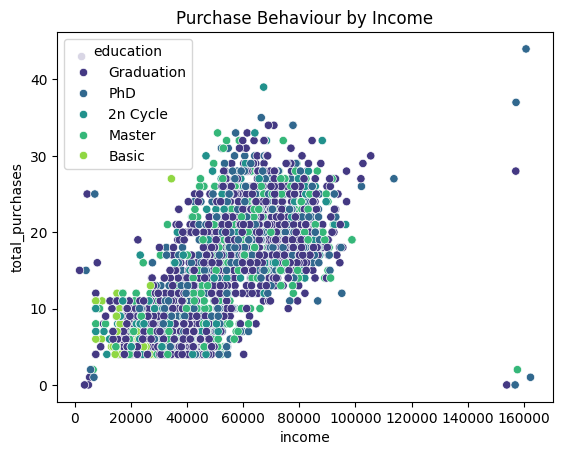

<Figure size 640x480 with 0 Axes>

In [70]:
plt.figure()
sns.scatterplot(x=data.income, y=data.total_purchases, 
                hue=data.education, palette='viridis')
plt.title('Purchase Behaviour by Income')
plt.show()
plt.clf()

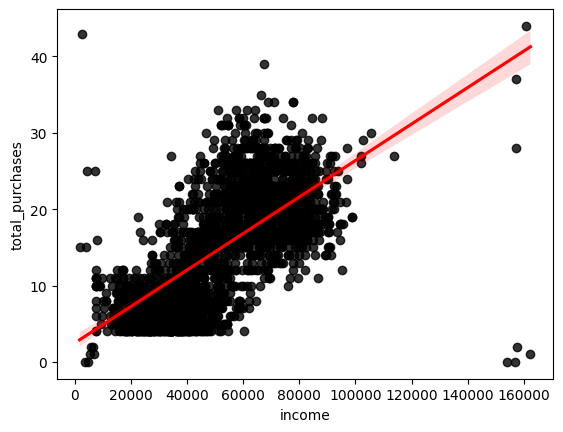

<Figure size 640x480 with 0 Axes>

In [71]:
plt.figure()
# regression plot of total_purchases vs income
sns.regplot(x=data.income, y=data.total_purchases,
            scatter_kws={'color':'black'}, line_kws={'color':'red'})
plt.show()
plt.clf()

The overall relationship between `income` and `total_purchases` is strong and linear. unfortunately, is still har to decipher any relationship between `education` and `total_purchases` as the points are scattered randomly accross the plot. 

#### More On Purchasing Behavior by Income <a class="anchor" id="section3_3"></a>

The following analysis is very similar as before. However, instead of looking at the relationship between `income` and `num_{type}_purchases`, this analysis will be looking at the relationship between `income` and `mnt_{type}_products`. The steps for this analysis will essentially be the same.

On MaritalStatus column, we can see come anomalies. "Absurd", "Alone" and "YOLO" are not a marital status. Since these anomalies are responsible for only 7 rows, we decide to drop the rows.

In [ ]:
data = data[~data.MaritalStatus.isin(['Absurd', 'Alone', 'YOLO'])]#.MaritalStatus.value_counts()

In [ ]:
df = data.id.groupby(data.Education).count()

# Pie Chart 

# differentiate colors
colors = ["#e5c2c0","#8fd5a6","#329f5b","#0c8346","#0d5d56"]

# separate the chart slices
explode = (0.05,0.05,0.05,0.05,0.05)

fig1, ax1 = plt.subplots(figsize=(8,5))
ax1.pie(df.values, colors=colors, labels=df.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)

# draw center circle
centre_circle = plt.Circle((0,0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')

plt.title('Clients by Education', fontsize=14)

plt.tight_layout()

plt.show()
plt.clf()

In [ ]:
df = data.id.groupby(data.MaritalStatus).count()
df = df.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(8,5))
ax.pie(df.values, labels=df.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode, colors=colors)

center_circle = plt.Circle((0,0), 0.5, fc='white')
fig =plt.gcf()
fig.gca().add_artist(center_circle)

ax.axis('equal')
plt.title('Clients by Marital Status', fontsize=14)
plt.tight_layout()

plt.show()
plt.clf()

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(16,5))

sns.kdeplot(data.Age, ax=ax[0], fill=True, color=colors[3])
ax[0].set_title('Age Density', fontsize=14)
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Density')
ax[0].yaxis.grid(alpha=0.3)
ax[0].set_axisbelow(True)

sns.kdeplot(data.Income, ax=ax[1], fill=True, color=colors[3])
ax[1].set_title('Income Density', fontsize=14)
ax[1].set_xlabel('Income')
ax[1].set_ylabel('Density')
ax[1].yaxis.grid(alpha=0.3)
ax[1].set_axisbelow(True)

plt.show()
plt.clf()

From this plots we can see that both Age and Income features are right-skewed, meaning that they contain outliers, so we'll investigate this data further starting with the Age feature.   

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(data.Age, ax=ax, palette = colors)
ax.yaxis.grid(alpha=0.3)
ax.set_axisbelow(True)

plt.title('Age Boxplot', fontsize=14)
plt.ylabel('Age')

plt.show()
plt.clf()

This plot shows that there are some highly unlikely outliers in the Age feature since values for this outliers are over 120. Since it's only three of them we decide to remove this values from the data. 

In [ ]:
# removing outliers in the Age feature
data = data[data.Age < 120]

We move on by analysing the Income feature and plotting the values. 

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

sns.boxplot(data.Income, ax=ax, palette=colors)
ax.yaxis.grid(alpha=0.3)
plt.title('Income Boxplot', fontsize=14)
plt.ylabel('Income')

plt.show()
plt.clf();

From this plot we can see that there is an outlier in the Income feature representing an income of over 600K an another at around 180k. Since it is highly unlikely for someoune to have an annual income of 600k in the real world we decide to remove this outlier from our data.

In [ ]:
# remove outlier from income
data = data[data.Income < 200000]

After removing the outliers, let's plot the Age and Income again. 

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16,4))

sns.boxplot(data.Age, ax=ax[0], palette=colors)
ax[0].yaxis.grid(alpha=0.3)
plt.title('Income Boxplot', fontsize=14)
plt.ylabel('Income')

sns.boxplot(data.Income, ax=ax[1], palette=colors)
ax[1].yaxis.grid(alpha=0.3)
plt.title('Income Boxplot', fontsize=14)
plt.ylabel('Income')

plt.show()
plt.clf();

#### Products

We follow our analysis on the products columns by looking at each feature.

In [ ]:
df = data[col_products]

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

sns.boxplot(df, palette=colors, legend=False)
ax.set_yscale('log')
plt.title('Products Bought Boxplot')
plt.xlabel('Products Bought')
plt.ylabel('Amount of Bought Products (log scale)')
ax.yaxis.grid(alpha=0.3)

plt.show()
plt.clf()

Considering what this data represents, being the amount of products anyone could buy, the outliers in this data are simply a matter of everyones choice. On this perspective I have decided to leave the data as is.  

In [ ]:
df = data[col_products].sum()
explode = [0.05 for i in range(len(df.index))]
fig, ax = plt.subplots(figsize=(8,6))

ax.pie(df.values, labels=df.index, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)
# draw_circle
center_circle = plt.Circle((0,0),0.65,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title('Products ')

plt.show()
plt.clf()